In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
import graphviz  
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

# Supervised learning
- Target variable $y$ (dependent variable) is known
  - 𝑦∈ℝ for regression problems
  - 𝑦∈{𝑐_1,𝑐_2, …,  𝑐_𝑛} for classification problems
- "Learning" is based on a training dataset $𝑇𝑅\{𝑥_𝑖, 𝑦_𝑖\}_𝑖^𝑛$, where 𝑛 is the number of samples (instances), $x_i \in X$ is a d-dimensional feature vector and $y_i \in Y$ is the dependent variable
- Aim: Minimize the error between the prediction ($\hat{y})$ and actual value ($y$)

## Performance evaluation and validation

- Problem: External test data is not available to estimate generalizabilty 
- Solution: Simulation using the training dataset
   - Percentage split
      - Random split into training (e.g., 60%) and test set (e.g., 40%)
   - Bootstrapping
       - Randomly select b samples with replacement
       - Calculate mean performance metrics
   - Cross-validation
       - Separation of dataset into $k$ partitions (e.g., 10). Stratiﬁcation ensures that each fold is representative (e.g., equal class distribution).
       - Use $k − 1$ partitions for training and the remaining part for testing
       - Repeated this procedure k-times
       - Calculate mean performance metrics


## Generalizability
![kMeans Step 1](images/general.png)

## Performance Evaluation Metrics
### Regression
- Mean squared error
$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}({\hat{y_{i}}}-y_{i})^{2}}$$
- Correlation coefficient (between $y$ and $\hat{y}$)
- Coefficient of determination 
$${\displaystyle R^{2} = 1-{\sum _{i}(\hat {y_{i}}-y_{i})^{2} \over \sum _{i}(y_{i}-{\bar {y}})^{2}}.\,}$$
- ...

## Performance Evaluation Metrics
### Classification
- Basis is the confusion matrix  (here binary)

n=57 | $\hat{Case}$ | $\hat{Control}$
-----| ------|----------
*Case* | 20 (TP)  | 5 (FN)
*Control* | 7 (FP)   | 25 (TN)

- Accuracy (caution when the class distribution is not balanced/skew)
$$ACC= \frac{TP+TN}{TP+FP+TN+FN} $$

- Error (caution when the class distribution is not balanced/skew)
$$ERR= 1 - ACC$$

- Sensitivity (Recall) = $\frac{TP}{TP+FN}$
- Specificity = $\frac{TN}{TN+FP}$
- Precision = $\frac{TP}{TP+FP}$
- F-score = $2 \cdot \frac{precision \cdot recall}{precision + recall}$
- Balanced accuracy (here $n_c=2$) = $\frac{\sum_{i=0}^{n_c} \frac{sensitivity_i+specificity_i}{2}}{n_c}$ 

## Approaches

> (Witten, I. H., Frank, E., Hall, M. A., & Pal, C. J. (2016). Data Mining: Practical Machine Learning Tools and Techniques. In Data Mining: Practical Machine Learning Tools and Techniques)

- Lazy (e.g., K-Nearest Neighbors)
- Function based (e.g., Linear or Logistic Regression, SVM, Neural Networks)
- Bayes (e.g., Naive Bayes) 
- Rule based (z.B. PART)
- Decision trees (e.g., RPART)
- Meta (e.g., Random Forest, Stacking)



## K-Nearest Neighbors
- Decision by considering the nearest neighbors ("lazy learning") $\rightarrow$ no model is learned
- Can be used for classification and regression
- Identify $k$-nearest neighbors by using a distance measure (e.g., Euclidean distance)
  - Mean value for regression
  - Mode value for classification
- Choosing k
  - Odd number if number of classes is even (to avoid ties)
  - 1 << k < 10/$\sqrt{n}$


## K-Nearest Neighbors cont. 
- Unweighted classification of object x (majority voting)
$${\displaystyle class(x) = \operatorname*{arg\,max}_{c_j \in C} \sum_{o \in kNN} \delta(c_j, class(o))}\\
		\delta(c_j, c_k) = \begin{cases}
		1 & \mbox{if } c_j = c_k \\
		0 & \mbox{else}
		\end{cases}$$
- Weighted classification (for imbalanced class distribution)
$${\displaystyle	class(x) = \operatorname*{arg\,max}_{c_j \in C} \sum_{o \in kNN} w(dist(o, x_i)) \cdot \delta(c_j, class(o))}\\
		w(d) = \frac{1}{d^2}$$

## K-Nearest Neigbhors cont.
### Parameter $k$

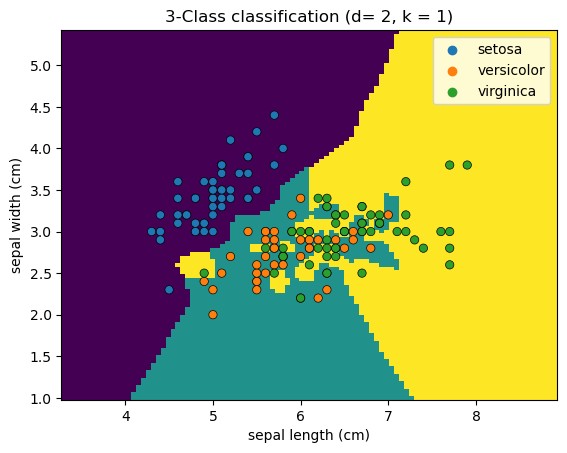

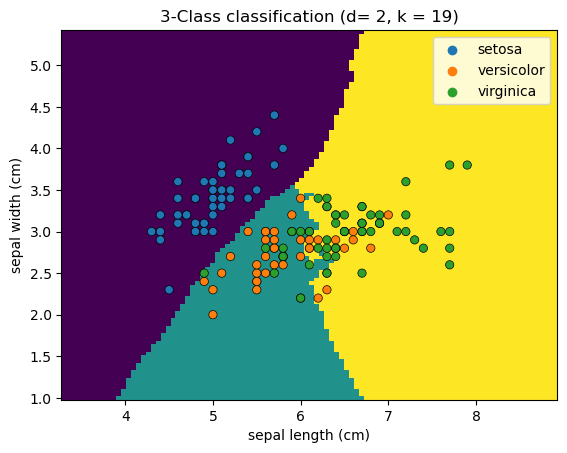

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

for k in [1, 19]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y) 
    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(knn, X, ax=ax, response_method="predict", plot_method="pcolormesh",
        xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], shading="auto", );
    sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=iris.target_names[y], alpha=1.0, edgecolor="black")
    plt.title("3-Class classification (d= 2, k = %i)" % (k))
    plt.show()


## K-Nearest Neigbhors cont.
### Modelparameter vs. hyperparameter
- Model parameter: Parameter of the model that can be learned from the data
- Hyperparameter: Parameter of the model that can not be directly learned from the data (manual input)
- Hyperparameter tuning: Process of finding an optimal set of parameters
  - Grid search: Use a set of all parameter combinations
  - Random search: Use random combination of parameter values
  - Further approaches (e.g., Bayesian Optimization)
- Error should be estimated using an independent test set

## K-Nearest Neighbors cont. 
### Pros
- Prediction performance
- Non-linear separation
- Scalability (new training data, multiple classes)

### Cons
- Efficiency
- No knowledge about decision boundary (no model is learned)


## K-Nearest Neighbors example (classification) 

Balanced accuracy 0.91


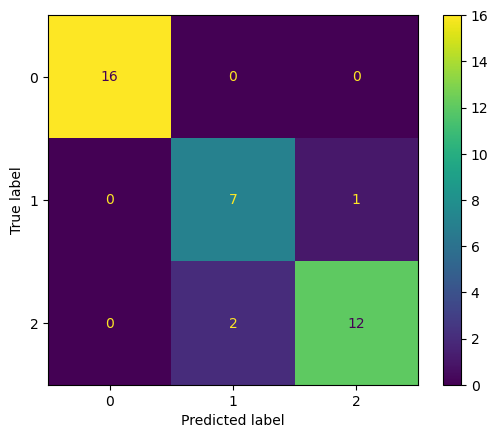

In [69]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
pipeline = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=pipeline_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_final.classes_)
disp.plot();
ba = np.round(balanced_accuracy_score(y_test, predictions), 2)
print("%s %s" % ("Balanced accuracy", ba))

## K-Nearest Neighbors example (classification) cont.

In [70]:
mba_cv = np.round(np.mean(cross_val_score(pipeline_final, X, y, cv=10, scoring="balanced_accuracy")),2)
print("%s %s" % ("Mean balanced accuracy (10-fold cv)", mba_cv))


Mean balanced accuracy (10-fold cv) 0.95


## Linear Regression
- Assumption: Linear relationship between the dependent variable ($y$) (also regressand or response variable) and independent variables ($X$) and a random normally distributed error ($\epsilon$)
$$\boldsymbol y = \boldsymbol X \boldsymbol \beta   + \boldsymbol \epsilon$$
- Determine $\beta$ coefficients using Least Squares

## Linear Regression cont. 
### Logistic Regression
 - Problem: $y$ includes class labels (not metric)
 - Solution
   - Introduce odds ratios  $\rightarrow$ range: $[0,\infty)$
   $${\displaystyle \operatorname {Odds} (Y_{1/0}):={\frac {\mathrm {P} (Y_{i}=1)}{1-\mathrm {P} (Y_{i}=1)}}={\frac {\mathrm {P} (Y_{i}=1)}{\mathrm {P} (Y_{i}=0)}}}$$
   - Introduce logit $\rightarrow$ range: $(-\infty,\infty)$
   $${\displaystyle \operatorname {Logit} (Y_{1/0})=\ln(\operatorname {Odds} (Y_{1/0}))=\ln {\frac {\mathrm {P} (Y_{i}=1)}{1-\mathrm {P} (Y_{i}=1)}}}$$
   - Solve equation
   $$\ln {\frac {\mathrm {P} (Y_{i}=1)}{1-\mathrm {P} (Y_{i}=1)}} =\underbrace{\beta_{0}+\beta _{1}X_{1}+\dots +\beta _{n}X_{n}}_{z}$$

## Linear Regression cont. 
### Pros
- Interpretation
- Fast
- Simple

### Cons
- Non-linear relationships

## Logistic regression example (classification)

In [7]:
lr_pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
mba = np.round(np.mean(cross_val_score(lr_pipe, X, y, cv=10, scoring="balanced_accuracy")),2)
print("%s %s" % ("Balanced accuracy", mba))

Balanced accuracy 0.96


## Decision Tree
 - Directed graph with decisions
 - Structure
   - Inner node represents a feature 
   - Edge represents a test on a node
   - Leaf represents the final class
 - Aim: Maximize purity through by recursive splits


## Decision Tree cont.

- Model construction
  - At the beginning all training instances are part of the root
  - Identify split attribute (e.g., considering impurity)
  - Partition training data using split attribute by minimizing node impurities
  - The procedure is continued recursively for the partitions ($\rightarrow$ local optimizing method)
- Stop criterion
  - No further split attribute
  - All training instances of one node are of same class
 - Prediction
  - Traverse tree from root to leaf (unique path)
  - Select leaf node

## Decision Tree cont.

- Variants
  - Regression trees
     - Regression model is ﬁtted to each node
     - Purity function: sum of squared deviations about the mean and the node predicting the sample mean of Y (AID, CART)
  - Decision trees (classiﬁcation)
      - Purity function: Gini index (CART), entropy (C4.5)
      
- Split strategies
  - Categoric
  - Numeric (< or ≥ T)

## Decision Tree cont.
### Purity functions for classification
- Gini index for set $T$ of training partitions $T_1, \ldots, T_m$ for attribute $A$ (small Gini index $\rightarrow$ small impurity) and $k$ classes
$$gini_A(T) = \sum_{i=1}^{m} \frac{|T_i|}{|T|} gini(T_i) \\
gini(T_i) = 1 - \sum_{j=1}^{k} p_{j}^2$$
- Values between 0 and 1
  - Small Gini index <-> small impurity (high purity)
  - High Gini index <-> high impurity (small purity)


## Decision Tree cont.
### Purity functions for classification cont. 
- Information gain, see also <a href="https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293" target="_blank">Entropy and IG</a>
$${\displaystyle \overbrace {IG(T,a)} ^{\text{Information Gain}}=\overbrace {H(T)} ^{\text{Entropy(parent)}}-\overbrace {H(T|a)} ^{\text{Weighted Sum of Entropy(Children)}}} \\
{\displaystyle H(T)=-\sum _{j=1}^{k}p_{j}\log _{2}^{}p_{j}}$$

## Decision Tree cont.
### Pros 
- Implicit feature ranking (embedded approach)
- Performance (in particular ensemble variants such as RF)
- Efficient prediction
- Handles multi class problems

### Cons
- Complexity for ﬁnding optimal decision tree
- Decision boundaries are parallel to the axis
- Prone to overﬁtting $\rightarrow$ pruning, minimum support (i.e., minimal number of samples per leaf node), minimum conﬁdence (i.e., minimal impurity per leaf node)


## Decision tree example (classification)

In [11]:
dtc_pipe = make_pipeline(preprocessing.StandardScaler(), tree.DecisionTreeClassifier())
mba = np.round(np.mean(cross_val_score(dtc_pipe, X, y, cv=10, scoring="balanced_accuracy")),2)
print("%s %s" % ("Balanced accuracy", mba))

Balanced accuracy 0.96


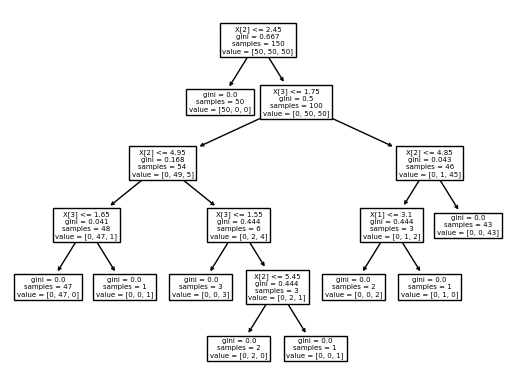

In [63]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X,y)
tree.plot_tree(dtc);

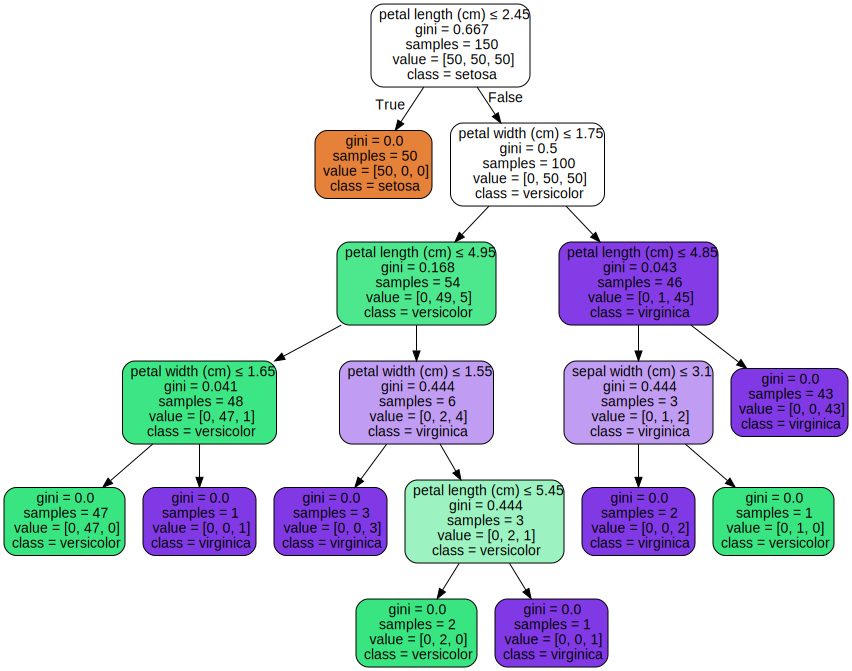

In [65]:
iris = datasets.load_iris()
dot_data = tree.export_graphviz(dtc, out_file=None,  feature_names=iris.feature_names,  class_names=iris.target_names,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Artificial Neural Network

- Biological motivation
- Artificial neuron with 3 input features ($x_1, x_2, x_3$), corresponding weightings (w_1, w_2, w_3) and activation function ($\phi(w^T x)$)
  - Threshold/binary (problematic)
  - Linear activation 
  - Logistic activation
  - ReLU activation 
  
![Simple ANN](images/ann.png)

## Artificial Neural Network cont.
- Approach: Learn the weights from labeled ($x_i , y_i$) pairs (training) and predict unlabeled data ($x_i, ?$) (testing) $\rightarrow$ Minimize error to obtain weights e.g., using quadratic loss
- Delta rule: Simple rule for calculating single weight updates $\Delta_{j\rightarrow k}$ for a single layer (no hidden layers, linear activation), Backpropagation generalizes this approach. 
$$\Delta w_{j \rightarrow k}=\eta (y_i - h(x_i,w))x_i$$
- Example
  - $y_1$ = 0.9 
  - $y_2$ = 0.7 (teaching input)
  
![Simple ANN](images/anndelta.png)

## Artificial Neural Network cont.
### Backpropagation

- initialize network weights (often small random values)
- do
  - forEach training example named ex
  - prediction = neural-net-output(network, ex) (forward pass)
  - actual = teacher-output(ex)
  - compute error (prediction - actual) at the output units
  - compute $\Delta w_h$ for all weights from hidden layer to output layer (backward pass)
  - compute $\Delta w_i$ for all weights from input layer to hidden layer (backward pass continued)
  - update network weights (input layer not modiﬁed by error estimate)
 - while all examples classiﬁed correctly or another stopping criterion satisﬁed


## Artificial Neural Network cont.
### Logic gate
E.g., NAND gate for $threshold = -3, w_1 = -2$ and $w_2 = -2$, i.e., 
 - $(-2)*\underline{0}+(-2)*\underline{0} > -3 \rightarrow \underline{1}$ 
 - $(-2)*\underline{1}+(-2)*\underline{0} > -3 \rightarrow \underline{1}$
 - $(-2)*\underline{0}+(-2)*\underline{1} > -3 \rightarrow \underline{1}$
 - $(-2)*\underline{1}+(-2)*\underline{1} \le -3 \rightarrow \underline{0}$

![NAND gate ANN](images/ann_nand.png)

## Artificial Neural Network using Python
- *sklearn* is only limited concerning Deep Neural Networks and GPU computing
- *Keras* provides a simple interface for several backends, including TensorFlow, Microsoft Cognitive Toolkit etc.
- Models are defined as a sequence of layers
- Epoch: One pass through all instances
- Batch: One or more instances within an epoch before weights are updated

In [23]:
X, y = datasets.load_iris(return_X_y=True)
n_features = X.shape[1]
n_classes = 3
n_nodes = 8

# One hot encoding
Y = preprocessing.OneHotEncoder().fit_transform(y[:, np.newaxis]).toarray()
# Scale data for convergence
X_scaled = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=123)
input_dim=n_features
output_dim=n_classes
model = Sequential()
model.add(Dense(n_nodes, input_dim=input_dim, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=keras.metrics.AUC(name='auc'))

history_callback = model.fit(X_train, Y_train,  batch_size=5, epochs=50, verbose=0,
                                 validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'keras' is not defined

## Hyperparameter tuning
- Model parameter: Parameter of the model that can be learned from the data
- Hyperparameter: Parameter of the model that can not be directly learned from the data (manual input) $\rightarrow$ control learning model complexity or training procedure $\rightarrow$ find optimal parameter
- Hyperparameter tuning: Process of finding an optimal set of parameters
  - Grid search: Use a set of all parameter combinations
  - Random search: Use random combination of parameter values
  - Further approaches (e.g., Evolutionary optimization, Bayesian Optimization)
- Important: Avoid overestimation by using nested cross validation or separate datasets into three parts
  - Training set for training, 
  - Validation set for hyperparameter tuning
  - Test set for estimating the final performance


## Hyperparameter tuning example (KNN)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=19))])
Balanced accuracy 0.88


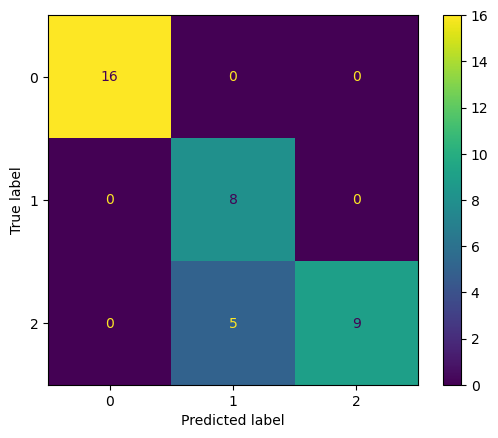

In [67]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

pipeline = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier())

param_grid={'kneighborsclassifier__n_neighbors': range(1,20)}
clf = GridSearchCV(pipeline, cv=10, param_grid=param_grid ,scoring='balanced_accuracy')

clf.fit(X_train, y_train)
print(clf.best_estimator_)

best_model = clf.best_estimator_
predictions = best_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
ba = np.round(balanced_accuracy_score(y_test, predictions), 2)
print("%s %s" % ("Balanced accuracy", ba))